# Regression

In [ ]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## 1- Data preparation

In [ ]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [ ]:
train_data.shape

(404, 13)

In [ ]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [ ]:
train_labels[0]

15.2

In [ ]:
mean = train_data.mean(axis=0)
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [ ]:
std = train_data.std(axis=0)
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [ ]:
train_data = train_data - mean
train_data = train_data / std

In [ ]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

## 2- Model design

In [ ]:
def build_model():
  model = Sequential([
      layers.Dense(64, activation="relu", input_shape=(13,)),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
      ])

  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                896       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


## 3- Training

In [ ]:
history = model.fit(train_data, train_labels,
                    batch_size=16,
                    epochs=20,
                    validation_split=0.2)

Epoch 1/20
21/21 [==============================] - 1s 11ms/step - loss: 504.2651 - mae: 20.4461 - val_loss: 505.4816 - val_mae: 20.4271
Epoch 2/20
21/21 [==============================] - 0s 4ms/step - loss: 364.4027 - mae: 16.8507 - val_loss: 347.2789 - val_mae: 16.3479
Epoch 3/20
21/21 [==============================] - 0s 4ms/step - loss: 219.6273 - mae: 12.3850 - val_loss: 208.9133 - val_mae: 11.6074
Epoch 4/20
21/21 [==============================] - 0s 4ms/step - loss: 118.3596 - mae: 8.5269 - val_loss: 117.0850 - val_mae: 8.2345
Epoch 5/20
21/21 [==============================] - 0s 3ms/step - loss: 71.3668 - mae: 6.3855 - val_loss: 80.6723 - val_mae: 6.6471
Epoch 6/20
21/21 [==============================] - 0s 3ms/step - loss: 48.1939 - mae: 5.0201 - val_loss: 52.3976 - val_mae: 5.1953
Epoch 7/20
21/21 [==============================] - 0s 3ms/step - loss: 35.0617 - mae: 4.0994 - val_loss: 38.4194 - val_mae: 4.4386
Epoch 8/20
21/21 [==============================] - 0s 4ms/st

## 4- Evaluation

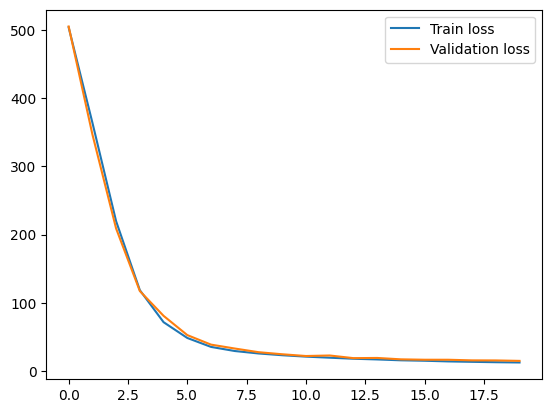

In [ ]:
losses = history.history['loss']
val_losses = history.history['val_loss']

plt.plot(losses, label='Train loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

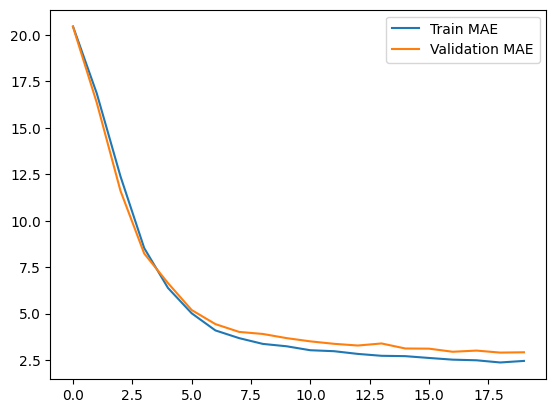

In [ ]:
maes = history.history['mae']
val_maes = history.history['val_mae']

plt.plot(maes, label='Train MAE')
plt.plot(val_maes, label='Validation MAE')
plt.legend()
plt.show()

In [ ]:
test_data -= mean
test_data /= std

In [ ]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 3ms/step - loss: 21.1855 - mae: 3.1357


[21.185522079467773, 3.1357481479644775]